## Write a program to implement `K-means clustering`. Find the number of clusters using `XB validity index`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [103]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, other):
        return np.sqrt(np.power(self.x - other.x, 2) + np.power(self.y - other.y, 2))
    
    def __repr__(self):
        return f"Point({self.x}, {self.y})"
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

In [104]:
# generating a dataset for using clustering algorithm
data, labels = make_blobs(n_samples=300, centers=3, random_state=10)

In [105]:
data = [Point(i[0], i[1]) for i in data]

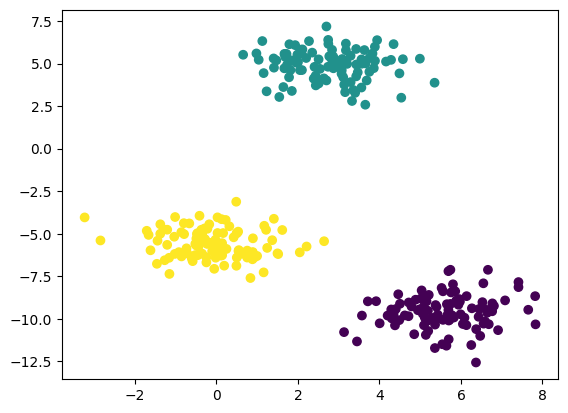

In [116]:
plt.scatter([p.x for p in data], [p.y for p in data], c=labels)
plt.show()

In [169]:
k = 3

# choose random k points from the dataset
initial_points = np.random.choice(data, size=k).tolist()
initial_points

[Point(4.381280327820482, -10.382969830484214),
 Point(-1.4456129646975782, -5.409358778127716),
 Point(3.653038826527491, 2.580505637380438)]

In [170]:
history = []
centroids = initial_points
next_centroids = [Point(0, 0)] * len(initial_points)
prev_centroids = centroids


while prev_centroids != next_centroids:
# for _ in range(10):
    clusters = {} 
    for i in data:
        d = []
        for j in centroids:
            d.append(i.distance(j))
        clusters.setdefault(d.index(min(d)), []).append(i)
        
    prev_centroids = centroids
    print(prev_centroids)
    
    for key, value in clusters.items():
        x = []
        y = []
        for i in value:
            x.append(i.x)
            y.append(i.y)
        m_x = sum(x) / len(x)
        m_y = sum(y) / len(y)
        
        centroids[key] = Point(m_x, m_y)
        
    next_centroids = centroids
    print(next_centroids)
    print()
    history.append(clusters)

[Point(4.381280327820482, -10.382969830484214), Point(-1.4456129646975782, -5.409358778127716), Point(3.653038826527491, 2.580505637380438)]
[Point(5.586253170401404, -9.59640300894258), Point(-0.09193382883560412, -5.559399532005582), Point(2.7906561059325314, 4.908061866013586)]



In [161]:
len(history)

1